points:  [-2.7554552980815445e-17, 0.05] [-0.3, 0.0]
a, b, c 0.3 0.05 0.30413812651491096
80.53767779197439


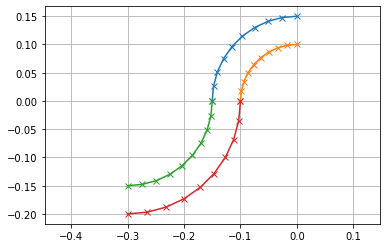

In [17]:
import matplotlib.pyplot as plt
import numpy as np

r_tube = 0.015
r_inlet_start = r_tube
r_inlet_end = 2.0 * r_tube
y_0 = 0.0
#r_inlet_start = fub::GetOptionOr(inlet_options, "r_start", r_inlet_start);
#r_inlet_end = fub::GetOptionOr(inlet_options, "r_end", r_inlet_end);
#y_0 = fub::GetOptionOr(inlet_options, "y_0", y_0);
height = 2.0
xlo = -height
xhi = 0.0
r = r_inlet_start
r2 = r_inlet_end
xdiv = xhi - 4.0 * r
#auto polygon =
#    MakePolygon(std::pair{xlo, y_0 + r}, std::pair{xdiv, y_0 + r},
#                std::pair{xhi, y_0 + r2}, std::pair{xhi, y_0 - r2},
#                std::pair{xdiv, y_0 - r}, std::pair{xlo, y_0 - r},
#                std::pair{xlo, y_0 + r})

coord = [[xlo, y_0+r], [xdiv, y_0+r], [xhi, y_0 +r2], [xhi, y_0 -r2], [xdiv, y_0-r], [xlo, y_0-r], [xlo, y_0+r]]
#coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
coord.append(coord[0]) #repeat the first point to create a 'closed loop'

xs, ys = zip(*coord) #create lists of x and y values

#f= plt.figure()
#plt.plot(xs,ys, "x-") 
# plt.show()
#f.clf()

radius = 0.15
offset = 0.05
x_c = 0.
y_c = 0.
def drawCircle(r, x_c, y_c, n_points, start=0.0, end=2.0*np.pi, a=1.0, b=1.0):
    # (x-x_c)**2/a**2 + (y-y_c)**2/b**2 = 1
    arr = np.linspace(start, end, num=n_points, endpoint=True)
    x = np.zeros((n_points))
    y = np.zeros((n_points))
    for i in range(n_points):
        y[i] = y_c - r * a * np.sin(arr[i])
        x[i] = x_c + r * b * np.cos(arr[i])
    return [x, y]

def getAngle(pointB, pointC):
    # line1
    #             x xB, yB
    #            /|
    #          c/ |
    #          /  |b
    #         /   |
    #xC, yC  x----x xA, yA
    #           a
    #
    # xB==xA, yC==yC

    xB = pointB[0]
    yB = pointB[1] 
    xC = pointC[0] 
    yC = pointC[1]

    a = np.abs(xB - xC)
    b = np.abs(yB - yC)
    #c = np.hypot(a, b) # is equal np.sqrt( a**2 + b**2 )
    c = np.sqrt( a**2 + b**2 )
    angle = np.arcsin( a/c )
    
    print("points: ", pointB, pointC)
    print("a, b, c", a, b, c)
    print(angle*360./(2.*np.pi))
    return angle



ncircle = 10

c1 = drawCircle(radius, x_c, y_c, ncircle, 3.*np.pi/2. , np.pi)
c2 = drawCircle(radius-offset, x_c, y_c, ncircle, 3.*np.pi/2. , np.pi)
#print(c1)
f, ax = plt.subplots(1, 1)
ax.plot( *c1 ,"x-" )
ax.plot( *c2 ,"x-" )

c3 = drawCircle(radius, c1[0][-1]-radius, c1[1][-1], ncircle, 3.*np.pi/2.-np.pi , np.pi-np.pi)
c4 = drawCircle(radius+offset, c1[0][-1]-radius, c1[1][-1], ncircle, 3.*np.pi/2.-np.pi , np.pi-np.pi)
ax.plot( *c3 ,"x-" )
ax.plot( *c4 ,"x-" )

def getMidpoint(p1, p2):
    #  x p1
    #  | 
    #  XX  <-- midpoint
    #  |
    #  x p2
    dx = np.abs(p1 - p2)
    return p2 + dx/2.

angle = getAngle( [c1[0][0], c1[1][0]-c2[1][0]], [c3[0][0], c3[1][-1]-c4[1][-1]] )

ax.axis('equal')
plt.grid(True)
plt.show()
f.clf()


In [ ]:
#def drawparallelLines(xB, yB, yA, angle, distance, n_points):
#    # line1
#    #             x xB, yB
#    #            /|
#    #          c/ |
#    #          /  |b
#    #         /   |
#    #xC, yC  x----x xA, yA
#    #           a
#    b = yB-yA
#    c = b / np.cos(angle)
#    a = c * np.sin(angle)
#    xA = xB
#    xC = xA-a
#    yC = yA
#
#    x1 = np.linspace(xA, xC, num=n_points)
#    y1 = np.linspace(yB, yC, num=n_points)
#
#    #fig = plt.figure()
#    #plt.plot([[xB,yB], [xA,yA], [xC,yC]], "x-")
#    #plt.show()
#    #fig.clear()
#
#    #line2 is only shifted by distance in x-direction
#    x2 = x1 +distance
#    y2 = y1
#    return [x1, y1], [x2, y2]

#ncircle = 10
#angle = 0.1745329251994 # 10°
## angle = np.pi/4.
#c1 = drawCircle(radius, x_c, y_c, ncircle, 3.*np.pi/2. , np.pi)
#c2 = drawCircle(radius-offset, x_c, y_c, ncircle, 3.*np.pi/2. , np.pi)
##print(c1)
#f, ax = plt.subplots(1, 1)
#ax.plot( *c1 ,"x-" )
#ax.plot( *c2 ,"x-" )
#l1, l2 = drawparallelLines(c1[0][-1], c1[1][-1], c1[1][-1]-offset, angle, offset, 4)
#ax.plot( *l1, "x-" )
#ax.plot( *l2, "x-" )

In [7]:
import math
import numpy as np

tube_n_cells = 256
# plenum_x_n_cells = 128
tube_blocking_factor = 8
plenum_blocking_factor = 8

massflow_cor = 0.24
diffusion = 3.0
outputPath = 'nTube_1_mul_3-0_massflow_0-24'

mode = 3 #%MODE%
boundary_condition = 'TurbineMassflowBoundaries' # '%BOUNDARY_CONDITION%'

n_level = 1

# y0s = [-1.0/3.0, 0.0, +1.0/3.0]

y0s = [0.0]

n_tubes = len(y0s)
r_tube = 0.015

D = 2.0 * r_tube

# calculate plenum geometry
inlet_length = 3.0 * D # [m]

plenum_y_lower = - 2*D
plenum_y_upper = + 2*D
plenum_y_length = plenum_y_upper - plenum_y_lower

TVolRPlen = 20.0 * D
plenum_x_upper = TVolRPlen / plenum_y_length
plenum_x_lower = -inlet_length
plenum_x_length = plenum_x_upper - plenum_x_lower

plenum_length = plenum_x_upper # [m]
tube_length = 1.0 # [m]

plenum_max_grid_size = max(plenum_blocking_factor, 1024)

plenum_domain_length = plenum_length + inlet_length
tube_domain_length = tube_length - inlet_length

tube_over_plenum_length_ratio = tube_domain_length / plenum_domain_length
plenum_over_tube_length_ratio = 1.0 / tube_over_plenum_length_ratio

plenum_x_n_cells = tube_n_cells * plenum_over_tube_length_ratio
plenum_x_n_cells -= plenum_x_n_cells % plenum_blocking_factor
plenum_x_n_cells = int(plenum_x_n_cells)

plenum_z_lower = plenum_y_lower
plenum_z_upper = plenum_y_upper
plenum_z_length = plenum_z_upper - plenum_z_lower

plenum_y_over_x_ratio = plenum_y_length / plenum_x_length

plenum_y_n_cells = plenum_x_n_cells * plenum_y_over_x_ratio
plenum_y_n_cells -= plenum_y_n_cells % plenum_blocking_factor
plenum_y_n_cells = int(plenum_y_n_cells)

plenum_z_over_x_ratio = plenum_z_length / plenum_x_length

plenum_z_n_cells = plenum_x_n_cells * plenum_z_over_x_ratio
plenum_z_n_cells -= plenum_z_n_cells % plenum_blocking_factor
plenum_z_n_cells = int(plenum_z_n_cells)

print("ncells x, y, z = [{}, {}, {}]".format(plenum_x_n_cells, plenum_y_n_cells, plenum_z_n_cells))
print("turbine length x, y, z = [{}, {}, {}]".format(plenum_x_length, plenum_y_length, plenum_z_length))

#Area_tube_inlet = D**2 * np.pi / 4.0
#Area_plenum = plenum_z_length * plenum_y_length
#Area_tube_outlet = 4.0 * Area_tube_inlet
#D_tube_outlet = math.sqrt( Area_tube_outlet *4.0 / np.pi )
Area_tube_inlet = D / D
Area_plenum = 1.0 * plenum_y_length / D
Area_tube_outlet = 4.0 * Area_tube_inlet
D_tube_outlet = math.sqrt( Area_tube_outlet *4.0 / np.pi ) *D

print("Area Plenum = {}".format(Area_plenum ))
print("Area Tube in = {}".format(Area_tube_inlet))
print("Area Tube out = {}".format(Area_tube_outlet))
print("D tube in = {}; tube out = {}".format(D, D_tube_outlet))
Vol_plenum = plenum_length * Area_plenum
Vol_tube = Area_tube_inlet * tube_length
print("Area ratio Pl/Tube = {}, should be 4".format(Area_plenum / Area_tube_inlet))
print("Volume ratio TP/Tube = {}, should be 20".format(Vol_plenum/Vol_tube))


ncells x, y, z = [1424, 32, 32]
turbine length x, y, z = [5.09, 0.12, 0.12]
Area Plenum = 4.0
Area Tube in = 1.0
Area Tube out = 4.0
D tube in = 0.03; tube out = 0.06770275002573076
Area ratio Pl/Tube = 4.0, should be 4
Volume ratio TP/Tube = 20.0, should be 20


In [9]:
import math
import numpy as np

tube_n_cells = 256
# plenum_x_n_cells = 128
tube_blocking_factor = 8
plenum_blocking_factor = 8

massflow_cor = 0.24
diffusion = 3.0
outputPath = 'nTube_1_mul_3-0_massflow_0-24'

mode = 3 #%MODE%
boundary_condition = 'TurbineMassflowBoundaries' # '%BOUNDARY_CONDITION%'

n_level = 1

LRef = 1.0

# y0s = [-1.0/3.0, 0.0, +1.0/3.0]

y0s = [0.0]

n_tubes = len(y0s)
r_tube = 0.015

D = 2.0 * r_tube

Area_tube_inlet = D**2 * np.pi / 4.0

plenum_y_length = math.sqrt(np.pi) * D
plenum_z_length = plenum_y_length

plenum_y_lower = 0.0 - plenum_y_length/2.0
plenum_y_upper = 0.0 + plenum_y_length/2.0

tube_length = 1.0
inlet_length = 3.0 * D # in x 

plenum_x_length = 5.0 * tube_length
plenum_x_upper = plenum_x_length
plenum_x_lower = -inlet_length

plenum_max_grid_size = max(plenum_blocking_factor, 1024)

plenum_domain_length = plenum_length #+ inlet_length
tube_domain_length = tube_length #- inlet_length

tube_over_plenum_length_ratio = tube_domain_length / plenum_domain_length
plenum_over_tube_length_ratio = 1.0 / tube_over_plenum_length_ratio

plenum_x_n_cells = tube_n_cells * plenum_over_tube_length_ratio
plenum_x_n_cells -= plenum_x_n_cells % plenum_blocking_factor
plenum_x_n_cells = int(plenum_x_n_cells)

plenum_z_lower = plenum_y_lower
plenum_z_upper = plenum_y_upper
#plenum_z_length = plenum_z_upper - plenum_z_lower

plenum_y_over_x_ratio = plenum_y_length / plenum_x_length

plenum_y_n_cells = plenum_x_n_cells * plenum_y_over_x_ratio
plenum_y_n_cells -= plenum_y_n_cells % plenum_blocking_factor
plenum_y_n_cells = int(plenum_y_n_cells)

plenum_z_over_x_ratio = plenum_z_length / plenum_x_length

plenum_z_n_cells = plenum_x_n_cells * plenum_z_over_x_ratio
plenum_z_n_cells -= plenum_z_n_cells % plenum_blocking_factor
plenum_z_n_cells = int(plenum_z_n_cells)


print("ncells x, y, z = [{}, {}, {}]".format(plenum_x_n_cells, plenum_y_n_cells, plenum_z_n_cells))
print("turbine length x, y, z = [{}, {}, {}]".format(plenum_x_length, plenum_y_length, plenum_z_length))

Area_plenum = plenum_z_length * plenum_y_length
Area_tube_outlet = 4.0 * Area_tube_inlet
D_tube_outlet = math.sqrt( Area_tube_outlet *4.0 / np.pi )
print("Area Plenum = {}".format(Area_plenum ))
print("Area Tube in = {}".format(Area_tube_inlet))
print("Area Tube out = {}".format(Area_tube_outlet))
print("D tube in = {}; tube out = {}".format(D, D_tube_outlet))
Vol_plenum = plenum_x_length * Area_plenum
Vol_tube = Area_tube_inlet * tube_domain_length
print("Area ratio Pl/Tube = {}, should be 4".format(Area_plenum / Area_tube_inlet))
print("Volume ratio TP/Tube = {}, should be 20".format(Vol_plenum/Vol_tube))

ncells x, y, z = [256, 0, 0]
turbine length x, y, z = [5.0, 0.05317361552716547, 0.05317361552716547]
Area Plenum = 0.002827433388230813
Area Tube in = 0.0007068583470577034
Area Tube out = 0.0028274333882308137
D tube in = 0.03; tube out = 0.06
Area ratio Pl/Tube = 3.9999999999999987, should be 4
Volume ratio TP/Tube = 19.999999999999993, should be 20
